Importing Libraries

In [2]:
import pandas as pd
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import json
import matplotlib.pyplot as plt

Load the Email Dataset

In [3]:
# Load the preprocessed email graph and labels
email_graph = nx.read_gml('data/email_graph.gml')
with open('data/email_labels.json', 'r') as f:
    email_labels = json.load(f)

Feature Extraction for Email Dataset

In [4]:
def extract_features_email(graph):
    degree = dict(graph.degree())
    clustering = nx.clustering(graph)
    betweenness = nx.betweenness_centrality(graph)
    
    features = pd.DataFrame({
        'node': list(graph.nodes()),
        'degree': [degree[node] for node in graph.nodes()],
        'clustering': [clustering[node] for node in graph.nodes()],
        'betweenness': [betweenness[node] for node in graph.nodes()],
        'department': [email_labels[str(node)] for node in graph.nodes()]
    })
    
    return features

email_features = extract_features_email(email_graph)
print(email_features.head())

  node  degree  clustering  betweenness  department
0    0      42    0.276423     0.001168           1
1    1      50    0.265306     0.001242           1
2    2      93    0.297803     0.006826          21
3    3      69    0.384910     0.001718          21
4    4      94    0.318691     0.005764          21


Scatterplot of Degree vs. Clustering Coefficient

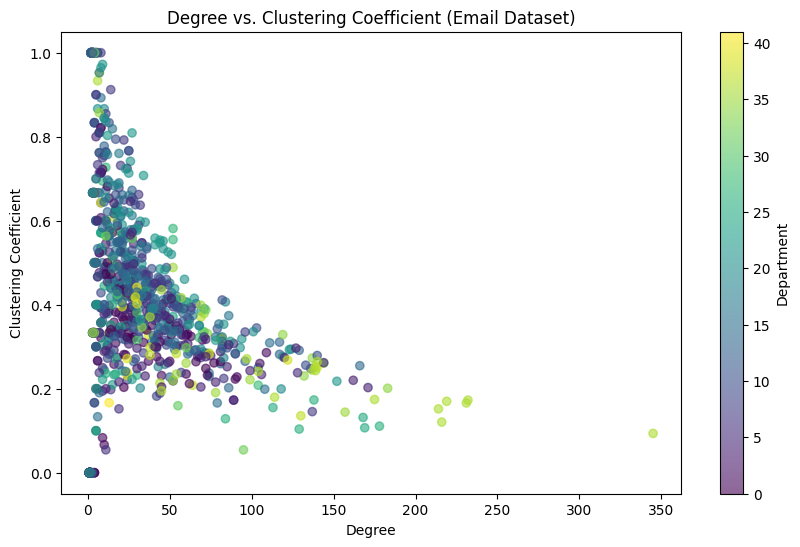

In [5]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(email_features['degree'], email_features['clustering'], c=email_features['department'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Department')
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.title('Degree vs. Clustering Coefficient (Email Dataset)')
plt.show()


Scatterplot of Betweenness vs. Clustering Coefficient


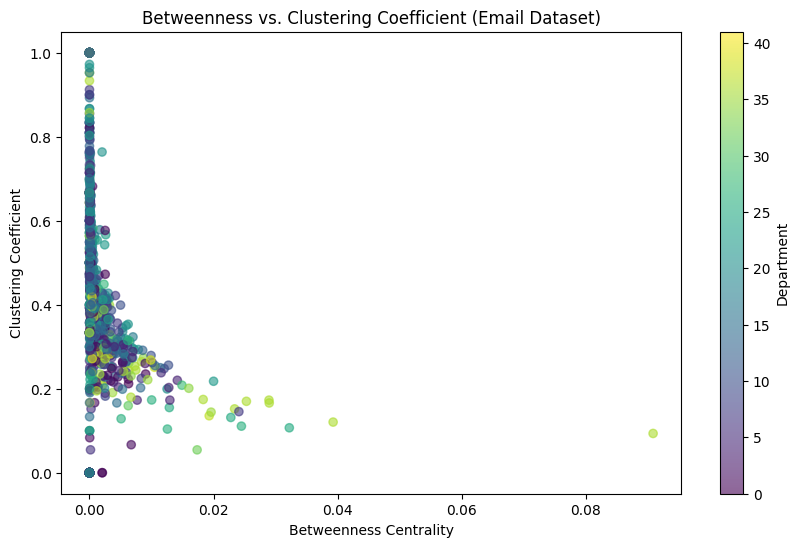

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(email_features['betweenness'], email_features['clustering'], c=email_features['department'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Department')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Clustering Coefficient')
plt.title('Betweenness vs. Clustering Coefficient (Email Dataset)')
plt.show()

Train-Test Split and Model Training for Email Dataset

In [7]:
 X_email = email_features[['degree', 'clustering', 'betweenness']]
y_email = email_features['department']

X_train_email, X_test_email, y_train_email, y_test_email = train_test_split(X_email, y_email, test_size=0.3, random_state=42)

In [8]:
# Random Forest Classifier
rf_clf_email = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf_email.fit(X_train_email, y_train_email)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [9]:
# Support Vector Machine (SVM) Classifier
svm_clf_email = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svm_clf_email.fit(X_train_email, y_train_email)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

Model Evaluation for Email Dataset

In [10]:
# Random Forest Evaluation
y_pred_rf_email = rf_clf_email.predict(X_test_email)
print("Random Forest Classification Report (Email Dataset):")
print(classification_report(y_test_email, y_pred_rf_email))


Random Forest Classification Report (Email Dataset):
              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.14      0.10      0.11        21
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.12      0.20      0.15        30
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         9
           7       0.07      0.08      0.07        12
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00        15
          11       0.50      0.17      0.25        12
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.24      0.21      0.23        28
          15       0.08      0.06      0.07        16
          16       0.50     

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

In [11]:
# SVM Evaluation
y_pred_svm_email = svm_clf_email.predict(X_test_email)
print("SVM Classification Report (Email Dataset):")
print(classification_report(y_test_email, y_pred_svm_email))


SVM Classification Report (Email Dataset):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         7
           4       0.10      0.70      0.17        30
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         9
           7       0.03      0.08      0.04        12
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         4
          14       0.09      0.14      0.11        28
          15       0.00      0.00      0.00        16
          16       0.00      0.00     

/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/adishdmc/Desktop/Masters/sem2/Graph Mining/graphmining/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param